In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statistics import stdev
import seaborn as sns

In [49]:
df=pd.read_csv("./datasets/Social_Network_Ads.csv")

In [50]:
df=df.iloc[:,2:]

In [51]:
df.sample(5)

,Age,EstimatedSalary,Purchased
277,49,88000,1
155,31,15000,0
83,35,88000,0
353,37,57000,0
238,46,82000,0


In [52]:
df.iloc[:,:2]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [53]:
df.iloc[:,2:3]

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [54]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:2],df.iloc[:,2:3],random_state=1,test_size=0.3)

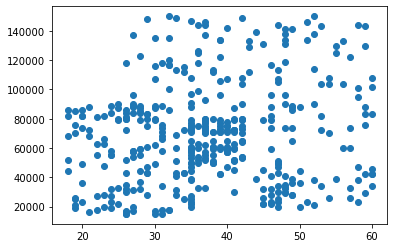

In [55]:
plt.scatter(df["Age"],df["EstimatedSalary"])
plt.show()

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280, 1), (120, 1))

In [57]:
X_train["Age"].mean(), X_train["EstimatedSalary"].mean()

(37.1, 69057.14285714286)

In [58]:
stdev(X_train["Age"]) , stdev(X_train["EstimatedSalary"])

(10.334061715570439, 34328.84852816711)

# StandardScaler

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

In [61]:
type(X_train_transformed)

numpy.ndarray

In [62]:
scaler.mean_

array([3.71000000e+01, 6.90571429e+04])

In [63]:
X_train_scaled=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_transformed,columns=X_train.columns)

In [64]:
X_train_scaled.shape

(280, 2)

In [65]:
X_test_scaled.shape

(120, 2)

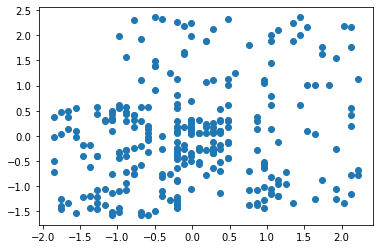

In [66]:
plt.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])
plt.show()

In [67]:
X_train_scaled["Age"].mean(), X_train_scaled["EstimatedSalary"].mean()

(-9.43689570931383e-17, 6.70098897005898e-17)

In [68]:
stdev(X_train_scaled["Age"]) , stdev(X_train_scaled["EstimatedSalary"])

(1.0017905117292143, 1.001790511729214)

In [69]:
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.100000,69057.142857
std,10.334062,34328.848528
min,18.000000,15000.000000
25%,29.000000,43000.000000
50%,37.000000,67000.000000
75%,43.500000,85000.000000
max,60.000000,150000.000000


In [70]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.1
75%,0.6,0.5
max,2.2,2.4


# Effect of the scalling

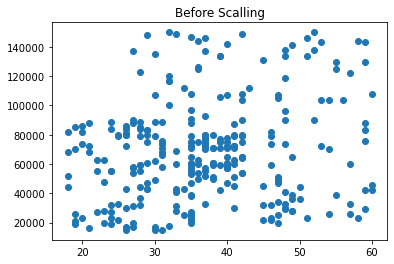

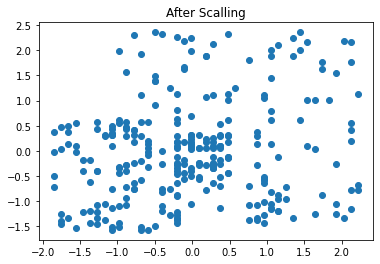

In [71]:
plt.scatter(X_train["Age"],X_train["EstimatedSalary"])
plt.title("Before Scalling")
plt.show()
plt.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])
plt.title("After Scalling")
plt.show()

 As we can see in the above picture, Shape of the data is same as for the earlier. So scalling of data doen't chance the shape of the data.

## Affect on the one column

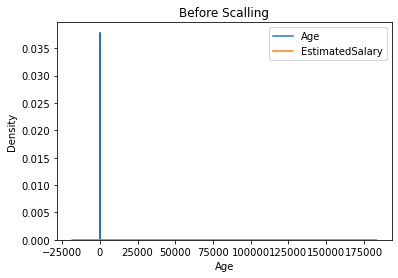

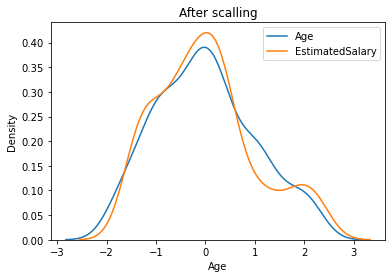

In [72]:
plt.title("Before Scalling")
sns.kdeplot(X_train["Age"],label="Age")
sns.kdeplot(X_train["EstimatedSalary"], label="EstimatedSalary")
plt.legend()
plt.show()
#After scalling

plt.title("After scalling")
sns.kdeplot(X_train_scaled["Age"],label="Age")

sns.kdeplot(X_train_scaled["EstimatedSalary"],label="EstimatedSalary")
plt.legend()
plt.show()

## Indivisual comparision

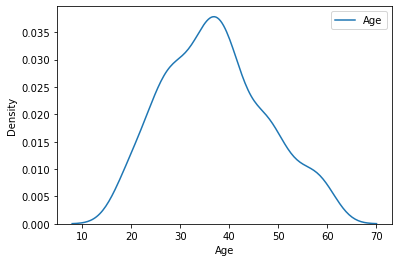

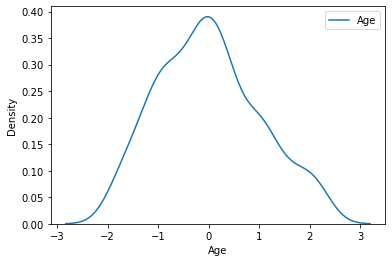

In [73]:
sns.kdeplot(X_train["Age"],label="Age")
plt.legend()
plt.show()
sns.kdeplot(X_train_scaled["Age"],label="Age")
plt.legend()
plt.show()

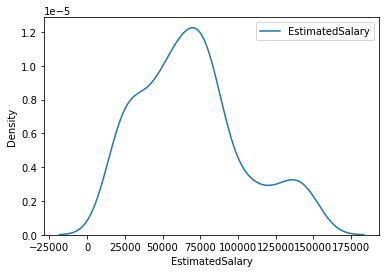

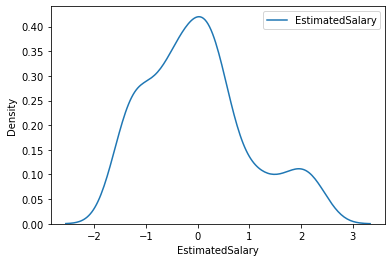

In [74]:
sns.kdeplot(X_train["EstimatedSalary"],label="EstimatedSalary")
plt.legend()
plt.show()
sns.kdeplot(X_train_scaled["EstimatedSalary"], label="EstimatedSalary")
plt.legend()
plt.show()

So as we can see in the above probability density function graph, representation of data doesn't change. Only scale is changed.

# Why Scalling is important

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [77]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [78]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
print("Actual",accuracy_score(y_pred,y_test))
print("Scalled",accuracy_score(y_pred_scaled,y_test))

Actual 0.6
Scalled 0.825


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [83]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [84]:
t_pred=dt.predict(X_test)
t_pred_scaled=dt_scaled.predict(X_test_scaled)

In [85]:
print("Original",accuracy_score(y_test,t_pred))
print("After_scalling",accuracy_score(y_test,t_pred_scaled))

Original 0.8416666666666667
After_scalling 0.8333333333333334


As we can see in the decision tree classifier, there is no effect of the scalling. Accuracy on the scale data and without scale is same.


# Effect of the Outlier

In [86]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [87]:
df.head(1)

,Age,EstimatedSalary,Purchased
0,19,19000,0


In [88]:
df.loc[len(df.index)]=[8,700,0]
df.loc[len(df.index)]=[80,450000,1]

In [89]:
df.shape

(402, 3)

In [90]:
df.describe()

,Age,EstimatedSalary,Purchased
count,402.000000,402.000000,402.000000
mean,37.686567,70516.666667,0.358209
std,10.770620,39098.321562,0.480071
min,8.000000,700.000000,0.000000
25%,29.250000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,80.000000,450000.000000,1.000000


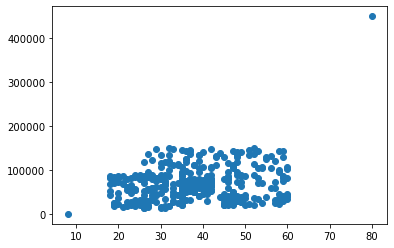

In [114]:
plt.scatter(df["Age"],df["EstimatedSalary"])
plt.show()

In [98]:
df.iloc[:,2:3]

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
397,1
398,0
399,1
400,0


In [100]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:2],df.iloc[:,2:3])

In [102]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((301, 2), (101, 2), (301, 1), (101, 1))

# StandardScaler

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler=StandardScaler()

In [105]:
scaler.fit(X_train)

StandardScaler()

In [106]:
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)

In [109]:
X_train_scaled=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_transformed,columns=X_train.columns)

In [110]:
X_train_scaled.head(2)

,Age,EstimatedSalary
0,0.791390,-0.990842
1,-1.052328,0.008633


In [111]:
X_test_scaled.head(2)

,Age,EstimatedSalary
0,0.791390,-1.090789
1,0.422646,1.932623


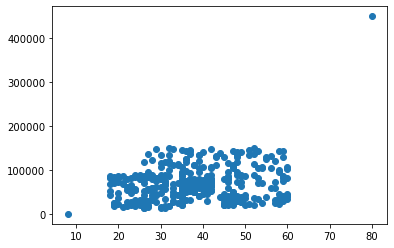

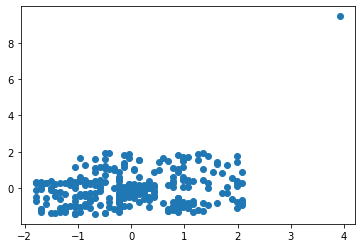

In [115]:
plt.scatter(df["Age"],df["EstimatedSalary"])
plt.show()
plt.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])
plt.show()

As we can see on the above diagram, there is no effect of standarization on the outlier. It is still outlier. Only scale of the data is changed.